In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import warnings

warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv("Logan_housing.csv")
df.head(3)

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   Garage Capacity    4110 non-null   int64 
 3   HOA Fee            4110 non-null   int64 
 4   Irregular Shape    4110 non-null   object
 5   Quadrant           4110 non-null   object
 6   School District    4110 non-null   object
 7   Sold Terms         4110 non-null   object
 8   Total Bedrooms     4110 non-null   int64 
 9   Total Bathrooms    4110 non-null   int64 
 10  Total Square Feet  4110 non-null   int64 
 11  Year Built         4110 non-null   int64 
 12  Zip                4110 non-null   int64 
 13  year_sold          4110 non-null   int64 
 14  month_sold         4110 non-null   int64 
 15  built_after_2000   4110 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 513.

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sold Price,4110.0,282125.245499,117864.718806,13000.0,214000.0,260000.0,324900.00,1900000.0
DOM,4110.0,40.550608,51.571991,1.0,6.0,23.0,56.00,712.0
Garage Capacity,4110.0,1.826034,1.094091,0.0,1.0,2.0,2.00,20.0
HOA Fee,4110.0,36.178345,69.565512,0.0,0.0,0.0,65.00,1050.0
Total Bedrooms,4110.0,3.821168,1.182697,1.0,3.0,4.0,5.00,9.0
Total Bathrooms,4110.0,2.577372,0.851165,1.0,2.0,3.0,3.00,7.0
Total Square Feet,4110.0,2370.429440,1049.690077,520.0,1583.0,2141.0,2941.75,10890.0
Year Built,4110.0,1989.287105,31.284714,1879.0,1976.0,2001.0,2012.00,2020.0
Zip,4110.0,84327.371533,8.617330,84305.0,84321.0,84321.0,84335.00,84341.0
year_sold,4110.0,2019.010462,0.816678,2018.0,2018.0,2019.0,2020.00,2020.0


In [77]:
df.describe(include="O").T

,count,unique,top,freq
Irregular Shape,4110,2,No,3741
Quadrant,4110,4,NE,1164
School District,4110,2,Cache,2735
Sold Terms,4110,6,Conventional,2201


In [78]:
df.isnull().sum() / len(df)

Sold Price           0.0
DOM                  0.0
Garage Capacity      0.0
HOA Fee              0.0
Irregular Shape      0.0
Quadrant             0.0
School District      0.0
Sold Terms           0.0
Total Bedrooms       0.0
Total Bathrooms      0.0
Total Square Feet    0.0
Year Built           0.0
Zip                  0.0
year_sold            0.0
month_sold           0.0
built_after_2000     0.0
dtype: float64

In [79]:
print(f"sum of duplicated: {sum(df.duplicated())}")
df.drop_duplicates(inplace=True)

sum of duplicated: 2


In [80]:
cat_cols = df.select_dtypes(include=["object"]).columns
print(f"columns: {cat_cols}")

columns: Index(['Irregular Shape', 'Quadrant', 'School District', 'Sold Terms'], dtype='object')


In [84]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df[cat_cols] = enc.fit_transform(df[cat_cols])

<Axes: >

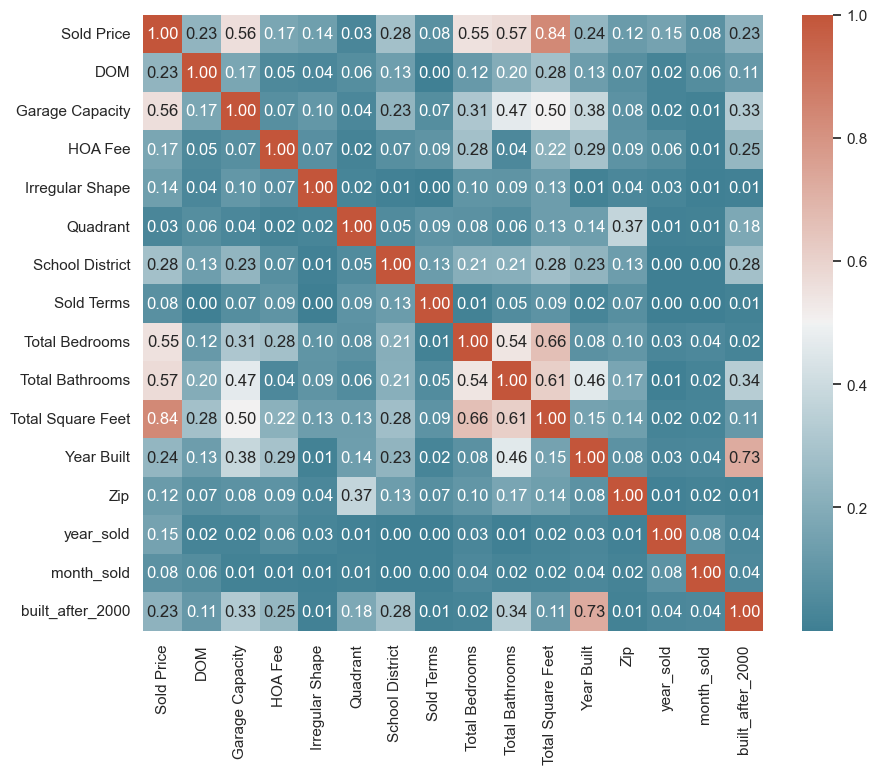

In [85]:
plt.figure(figsize=(10, 8))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(df.corr().abs(), annot=True, cmap=cmap, fmt=".2f")

In [86]:
X = df.drop("Sold Price", axis=1)
y = df["Sold Price"]

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [89]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
preds = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
preds.head(5)

,y_test,y_pred
2358,335600,355645.41
3611,280000,283708.00
2722,481000,452680.97
2256,485000,419359.09
680,234000,246923.24


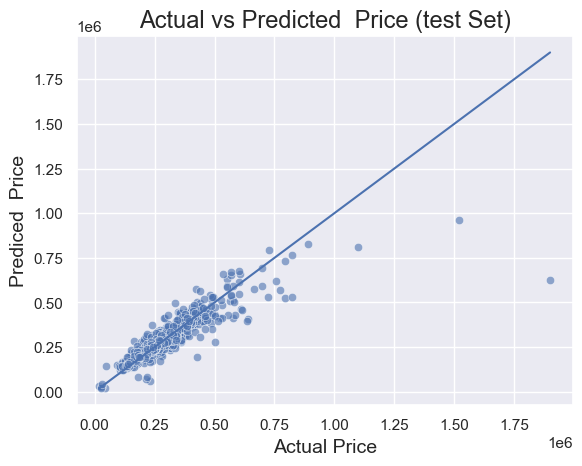

In [90]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)

plt.xlabel("Actual Price", fontsize=14)
plt.ylabel("Prediced  Price", fontsize=14)
plt.title("Actual vs Predicted  Price (test Set)", fontsize=17)
plt.show()

In [91]:
np.round(rfr.score(X_test, y_test), 4)

0.777

In [92]:
MSE_test = round(np.mean(np.square(y_test - y_pred)), 2)
RMSE_test = round(np.sqrt(MSE_test), 2)
RMSE_test

56565.89

In [93]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    "n_estimators": [5, 10, 20, 40, 80, 120, 240],
    "max_features": ["sqrt", "log2"],
    "max_depth": [2, 4, 6, 8, 10],
}
grid = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=params_grid,
    refit=True,
    verbose=2,
    cv=5,
)
grid.fit(X_train, y_train)
print(f"best_params: {grid.best_params_}")
print(f"best_estimator: {grid.best_estimator_}")

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END .....max_depth=2, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=20; total time=   0.0s
[CV] END ....max_depth=2, max_features=sqrt, n_

In [94]:
y_pred_opt = grid.predict(X_test)
preds["y_pred_opt"] = y_pred_opt
preds.head(5)

,y_test,y_pred,y_pred_opt
2358,335600,355645.41,357333.328979
3611,280000,283708.00,285561.584194
2722,481000,452680.97,449475.253434
2256,485000,419359.09,384881.794415
680,234000,246923.24,259649.850651


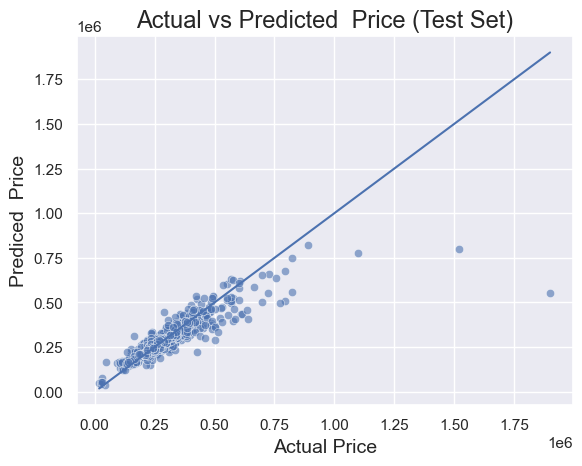

In [95]:
sns.scatterplot(x=y_test, y=y_pred_opt, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)

plt.xlabel("Actual Price", fontsize=14)
plt.ylabel("Prediced  Price", fontsize=14)
plt.title("Actual vs Predicted  Price (Test Set)", fontsize=17)
plt.show()

In [96]:
np.round(grid.score(X_test, y_test), 4)

0.7546

In [97]:
MSE_test_opt = round(np.mean(np.square(y_test - y_pred_opt)), 2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt), 2)
RMSE_test_opt

59333.09

In [98]:
from sklearn.model_selection import cross_val_score

R2 = cross_val_score(
    estimator=RandomForestRegressor(max_depth=10, max_features="sqrt", n_estimators=80),
    X=X_train,
    y=y_train,
    cv=5,
    scoring="r2",
)
R2_CV = round(np.mean(R2), 4)
R2_CV

0.8028

In [99]:
features = list(X_train.columns)
features

['DOM',
 'Garage Capacity',
 'HOA Fee',
 'Irregular Shape',
 'Quadrant',
 'School District',
 'Sold Terms',
 'Total Bedrooms',
 'Total Bathrooms',
 'Total Square Feet',
 'Year Built',
 'Zip',
 'year_sold',
 'month_sold',
 'built_after_2000']

In [100]:
rfr = RandomForestRegressor(max_depth=10, max_features="sqrt", n_estimators=80)
rfr.fit(X_train, y_train)
importance = rfr.feature_importances_
FIM = pd.DataFrame({"Features": X_train.columns, "Feature_Importance": importance})
FIM = FIM.sort_values(by=["Feature_Importance"])
FIM.head(5)

,Features,Feature_Importance
3,Irregular Shape,0.007611
4,Quadrant,0.013545
5,School District,0.014786
14,built_after_2000,0.015058
6,Sold Terms,0.017984


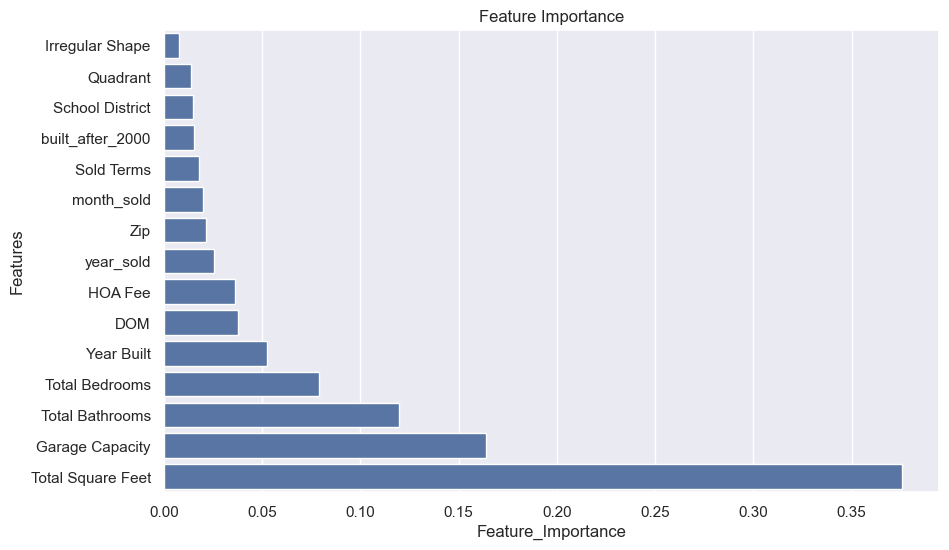

In [101]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
sns.barplot(y="Features", x="Feature_Importance", data=FIM)
plt.show()

In [102]:
df = pd.read_csv("credit_card_clean.csv")
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  object 
 3   EDUCATION  30000 non-null  object 
 4   MARRIAGE   30000 non-null  object 
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [104]:
df.isnull().sum() / len(df)

ID           0.0
LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_1        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
DEFAULT      0.0
dtype: float64

In [105]:
cat_cols = df.select_dtypes(include=["object"]).columns
print(f"columns: {cat_cols}")

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df[cat_cols] = enc.fit_transform(df[cat_cols])

columns: Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')


In [106]:
y = df["DEFAULT"]
X = df.drop(["DEFAULT", "ID"], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

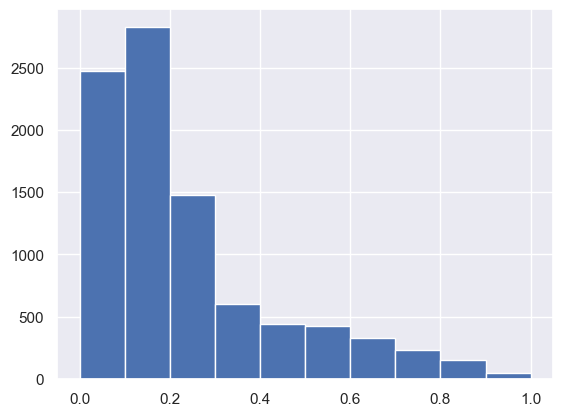

In [108]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_pred_probs = rfc.predict_proba(X_test)[:, 1]
plt.hist(y_pred_probs)
plt.show()

In [109]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6618  422]
 [1246  714]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.81      0.80      9000



In [110]:
params_grid = {
    "n_estimators": [10, 20, 50, 100],
    "criterion": ["entropy", "gini"],
    "max_features": ["log2"],
    "max_depth": [2, 4, 8, 16],
}
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=params_grid,
    refit=True,
    verbose=2,
    cv=5,
)

grid.fit(X_train, y_train)
print(f"best_params: {grid.best_params_}")

print(f"best_estimator: {grid.best_estimator_}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=20; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=20; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=20; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=20; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=2

In [111]:
y_pred_opt = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred_opt))
print(classification_report(y_test, y_pred_opt))

[[6709  331]
 [1280  680]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [112]:
rfcb = RandomForestClassifier(
    random_state=42,
    criterion="entropy",
    max_features="log2",
    max_depth=10,
    class_weight="balanced_subsample",
)
y_pred_balanced = rfcb.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))

[[5964 1076]
 [ 876 1084]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7040
           1       0.50      0.55      0.53      1960

    accuracy                           0.78      9000
   macro avg       0.69      0.70      0.69      9000
weighted avg       0.79      0.78      0.79      9000



No Skill     : ROC AUC=0.500
Random Forest: ROC AUC=0.774


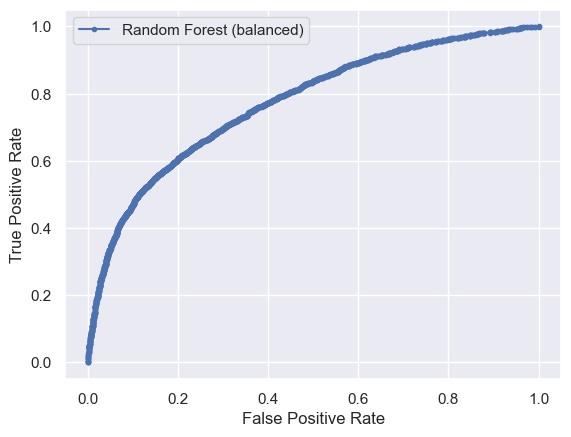

In [113]:
from sklearn.metrics import roc_curve, roc_auc_score

ns_probs = [0 for i in range(len(y_test))]
lr_probs = rfcb.predict_proba(X_test)[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print(f"No Skill     : ROC AUC={ns_auc:.3f}")
print(f"Random Forest: ROC AUC={lr_auc:.3f}")


ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(lr_fpr, lr_tpr, marker=".", label="Random Forest (balanced)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

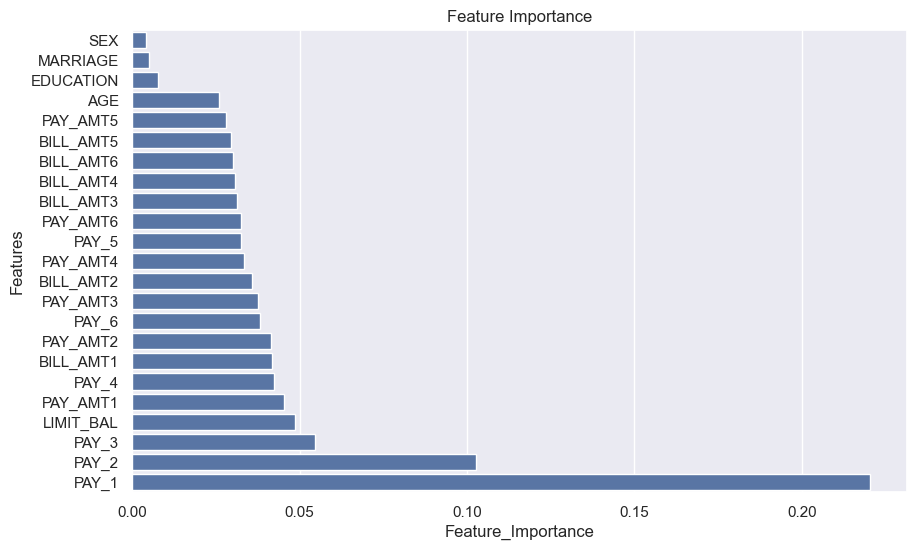

In [114]:
importance = rfcb.feature_importances_
FIM = pd.DataFrame({"Features": X_train.columns, "Feature_Importance": importance})
FIM = FIM.sort_values(by=["Feature_Importance"])
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
sns.barplot(y="Features", x="Feature_Importance", data=FIM)
plt.show()